## This notebook aims to visualize and test the EONIA distribution produced by GAN

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import scipy.stats as stats


from dotenv.main import load_dotenv
load_dotenv(override=True)

import os

## Note to self -- We only test EONIA

In [2]:
def fetch_data_df():
    # Load the data
    df = pd.read_csv('../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    start_test_date = os.getenv("START_TEST_DATE")
    
    if start_test_date is None:
        raise ValueError("Environment variable 'START_TEST_DATE' is not set.")

    start_test_date = pd.to_datetime(start_test_date)
    
    # Select only the third, sixth, and seventh columns

    # 2, 5, 6
    selected_columns = df.iloc[:, [6]]  # Remember: Python uses 0-based indexing

    pre_test_df = selected_columns[selected_columns.index < start_test_date]
    test_df = selected_columns[selected_columns.index >= start_test_date].iloc[:252]
    
    return pre_test_df, test_df

returns_df, test_returns_df = fetch_data_df()

In [3]:
asset_names = returns_df.columns

## Define a Measure of Success

What constetutes a good generated distribution for EONIA.

This is due to the fact that on Mondays you factor in the weekend.

<Axes: title={'center': 'EONIA Returns for 2006-05'}, xlabel='Date'>

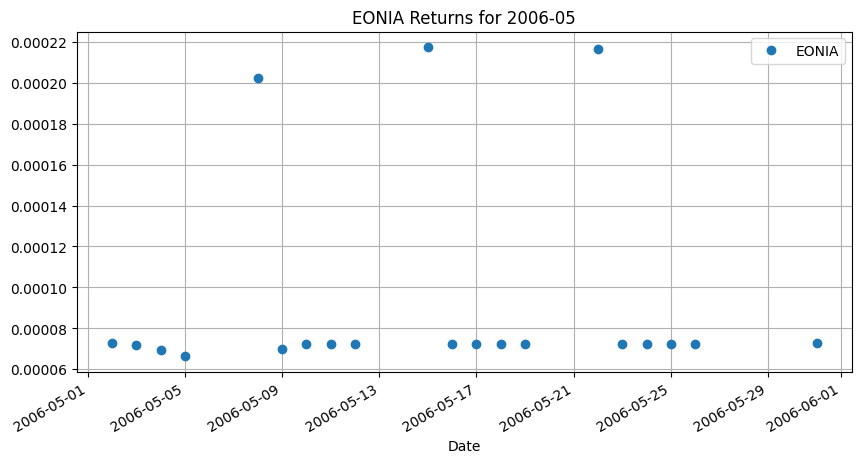

In [4]:
month = '2006-05'  # Change this to the desired year and month (YYYY-MM)
filtered_df = returns_df.loc[month]

# Plot
filtered_df.plot(y='EONIA', marker='o', linestyle='', figsize=(10, 5), grid=True, title=f"EONIA Returns for {month}")



<Axes: xlabel='Date'>

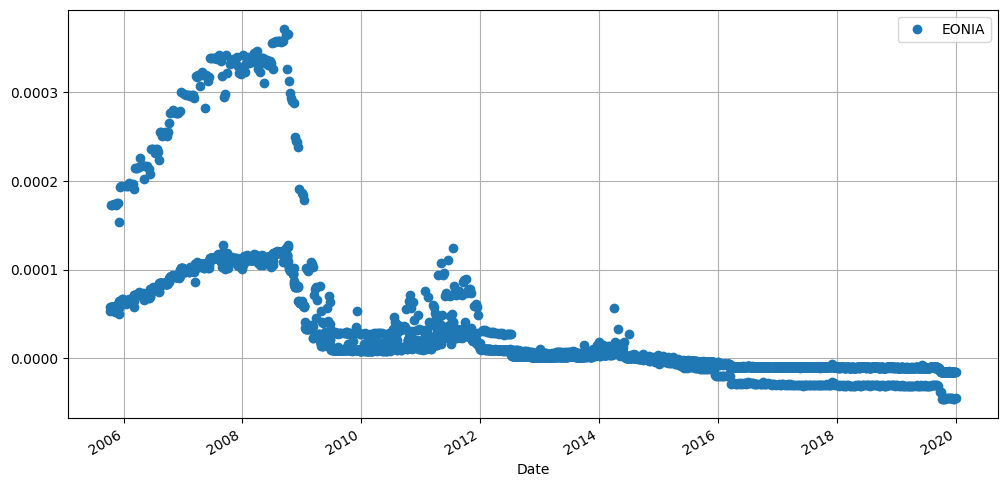

In [5]:
returns_df.plot(y='EONIA', marker='o', linestyle='', figsize=(12,6), grid=True)

In [6]:
from gan10 import GAN10

for asset_name in returns_df.columns:
    print(f"Training WGAN for {asset_name}...")
    asset_returns = returns_df[asset_name]
    
    # Create WGAN instance for the current asset
    gan = GAN10(asset_returns, asset_name)
    
    # Train WGAN for this asset
    gan.train()
    
    print(f"Finished training WGAN for {asset_name}.\n")


Training WGAN for EONIA...


C:\Users\nicka\compute-farm\machine_2\gan10.py:87: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  recency_loss = F.mse_loss(gen_returns.mean(dim=1), real_returns.mean(dim=1))  # Match recent mean trend


[Epoch 0/100] [Batch 0/25] [D loss: -0.24825742840766907] [G loss: -0.14479181170463562] [Recency Loss: 1.2689013481140137]


[Epoch 0/100] [Batch 10/25] [D loss: 0.2884034514427185] [G loss: -0.05677695944905281] [Recency Loss: 1.2665188312530518]


[Epoch 0/100] [Batch 20/25] [D loss: -0.14681443572044373] [G loss: -0.09430979937314987] [Recency Loss: 1.2653932571411133]
[Epoch 1/100] [Batch 0/25] [D loss: 0.17966170608997345] [G loss: -0.18401439487934113] [Recency Loss: 1.2640810012817383]


C:\Users\nicka\compute-farm\machine_2\gan10.py:87: UserWarning: Using a target size (torch.Size([115, 1])) that is different to the input size (torch.Size([115])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  recency_loss = F.mse_loss(gen_returns.mean(dim=1), real_returns.mean(dim=1))  # Match recent mean trend


[Epoch 1/100] [Batch 10/25] [D loss: -0.14167657494544983] [G loss: -0.012019440531730652] [Recency Loss: 1.262802243232727]


[Epoch 1/100] [Batch 20/25] [D loss: 0.16002479195594788] [G loss: -0.14291827380657196] [Recency Loss: 1.2604457139968872]
[Epoch 2/100] [Batch 0/25] [D loss: -0.12900081276893616] [G loss: -0.04500850662589073] [Recency Loss: 1.259594202041626]


[Epoch 2/100] [Batch 10/25] [D loss: -0.21079124510288239] [G loss: -0.19387821853160858] [Recency Loss: 1.2585430145263672]


[Epoch 2/100] [Batch 20/25] [D loss: 0.036019012331962585] [G loss: 0.14988470077514648] [Recency Loss: 1.2571580410003662]
[Epoch 3/100] [Batch 0/25] [D loss: 0.37600940465927124] [G loss: -0.04063049703836441] [Recency Loss: 1.2550230026245117]


[Epoch 3/100] [Batch 10/25] [D loss: -0.03403370827436447] [G loss: 0.1804390400648117] [Recency Loss: 1.2539114952087402]


[Epoch 3/100] [Batch 20/25] [D loss: 0.18193911015987396] [G loss: 0.17901720106601715] [Recency Loss: 1.252624273300171]
[Epoch 4/100] [Batch 0/25] [D loss: 0.4425559639930725] [G loss: 0.03891214728355408] [Recency Loss: 1.2510229349136353]


[Epoch 4/100] [Batch 10/25] [D loss: 0.01741839572787285] [G loss: -0.0361940860748291] [Recency Loss: 1.2500351667404175]


[Epoch 4/100] [Batch 20/25] [D loss: -0.20521441102027893] [G loss: 0.03299185633659363] [Recency Loss: 1.2488144636154175]
[Epoch 5/100] [Batch 0/25] [D loss: 0.16348206996917725] [G loss: 0.13486811518669128] [Recency Loss: 1.2480275630950928]


[Epoch 5/100] [Batch 10/25] [D loss: -0.5354856252670288] [G loss: 0.2489023059606552] [Recency Loss: 1.2457267045974731]


[Epoch 5/100] [Batch 20/25] [D loss: -0.24562734365463257] [G loss: 0.011227928102016449] [Recency Loss: 1.2444524765014648]
[Epoch 6/100] [Batch 0/25] [D loss: -0.27720075845718384] [G loss: -0.07444347441196442] [Recency Loss: 1.2438000440597534]


[Epoch 6/100] [Batch 10/25] [D loss: 0.13941708207130432] [G loss: 0.2415662407875061] [Recency Loss: 1.2415767908096313]


[Epoch 6/100] [Batch 20/25] [D loss: -0.37933284044265747] [G loss: 0.046549536287784576] [Recency Loss: 1.2406190633773804]
[Epoch 7/100] [Batch 0/25] [D loss: -0.28409504890441895] [G loss: 0.36233171820640564] [Recency Loss: 1.239112377166748]


[Epoch 7/100] [Batch 10/25] [D loss: 0.016026422381401062] [G loss: 0.3864748477935791] [Recency Loss: 1.2381175756454468]


[Epoch 7/100] [Batch 20/25] [D loss: -0.018819481134414673] [G loss: 0.3330685794353485] [Recency Loss: 1.2363888025283813]
[Epoch 8/100] [Batch 0/25] [D loss: 0.09589841961860657] [G loss: 0.12460130453109741] [Recency Loss: 1.2350679636001587]


[Epoch 8/100] [Batch 10/25] [D loss: -0.47443315386772156] [G loss: 0.28991982340812683] [Recency Loss: 1.234065294265747]


[Epoch 8/100] [Batch 20/25] [D loss: 0.38124948740005493] [G loss: 0.48197323083877563] [Recency Loss: 1.232033133506775]


[Epoch 9/100] [Batch 0/25] [D loss: -0.22566330432891846] [G loss: 0.337121844291687] [Recency Loss: 1.2314032316207886]


[Epoch 9/100] [Batch 10/25] [D loss: -0.11505687236785889] [G loss: 0.26449060440063477] [Recency Loss: 1.229733943939209]


[Epoch 9/100] [Batch 20/25] [D loss: 0.34750860929489136] [G loss: 0.3229388892650604] [Recency Loss: 1.228718638420105]


[Epoch 10/100] [Batch 0/25] [D loss: 0.28835180401802063] [G loss: 0.1378306895494461] [Recency Loss: 1.2275933027267456]


[Epoch 10/100] [Batch 10/25] [D loss: -0.12096083164215088] [G loss: 0.13572606444358826] [Recency Loss: 1.2258667945861816]


[Epoch 10/100] [Batch 20/25] [D loss: -0.12599682807922363] [G loss: 0.2713971734046936] [Recency Loss: 1.2249398231506348]
[Epoch 11/100] [Batch 0/25] [D loss: 0.01343873143196106] [G loss: 0.3531636893749237] [Recency Loss: 1.2239129543304443]


[Epoch 11/100] [Batch 10/25] [D loss: 0.42974746227264404] [G loss: 0.30985167622566223] [Recency Loss: 1.2212895154953003]


[Epoch 11/100] [Batch 20/25] [D loss: -0.243780255317688] [G loss: 0.17470957338809967] [Recency Loss: 1.2193841934204102]
[Epoch 12/100] [Batch 0/25] [D loss: -0.17862099409103394] [G loss: 0.3305927515029907] [Recency Loss: 1.219684362411499]


[Epoch 12/100] [Batch 10/25] [D loss: -0.1610528826713562] [G loss: 0.49812278151512146] [Recency Loss: 1.2175734043121338]


[Epoch 12/100] [Batch 20/25] [D loss: -0.4445144534111023] [G loss: 0.3764134645462036] [Recency Loss: 1.217012643814087]


[Epoch 13/100] [Batch 0/25] [D loss: 0.13026490807533264] [G loss: 0.3595929443836212] [Recency Loss: 1.2147244215011597]


[Epoch 13/100] [Batch 10/25] [D loss: 0.20599102973937988] [G loss: 0.7271686792373657] [Recency Loss: 1.2130802869796753]


[Epoch 13/100] [Batch 20/25] [D loss: 0.24338456988334656] [G loss: 0.7815772294998169] [Recency Loss: 1.2118339538574219]
[Epoch 14/100] [Batch 0/25] [D loss: -0.28589099645614624] [G loss: 0.5007769465446472] [Recency Loss: 1.2096422910690308]


[Epoch 14/100] [Batch 10/25] [D loss: -0.12390190362930298] [G loss: 0.5705956220626831] [Recency Loss: 1.2093489170074463]


[Epoch 14/100] [Batch 20/25] [D loss: -0.7164401412010193] [G loss: 0.7719500064849854] [Recency Loss: 1.2084660530090332]
[Epoch 15/100] [Batch 0/25] [D loss: 0.4246816337108612] [G loss: 0.5899614095687866] [Recency Loss: 1.2076835632324219]


[Epoch 15/100] [Batch 10/25] [D loss: 0.2656088173389435] [G loss: 0.5039668679237366] [Recency Loss: 1.2051730155944824]


[Epoch 15/100] [Batch 20/25] [D loss: 0.09664562344551086] [G loss: 0.6886303424835205] [Recency Loss: 1.2045435905456543]
[Epoch 16/100] [Batch 0/25] [D loss: -0.19060438871383667] [G loss: 0.6862896084785461] [Recency Loss: 1.2025132179260254]


[Epoch 16/100] [Batch 10/25] [D loss: -0.40956056118011475] [G loss: 0.4321342706680298] [Recency Loss: 1.2018580436706543]


[Epoch 16/100] [Batch 20/25] [D loss: -0.19307804107666016] [G loss: 0.538658082485199] [Recency Loss: 1.1998571157455444]
[Epoch 17/100] [Batch 0/25] [D loss: -0.05913567543029785] [G loss: 0.6750316023826599] [Recency Loss: 1.1992201805114746]


[Epoch 17/100] [Batch 10/25] [D loss: -0.2751784324645996] [G loss: 0.9196431040763855] [Recency Loss: 1.197900414466858]


[Epoch 17/100] [Batch 20/25] [D loss: -0.11892485618591309] [G loss: 0.7960540652275085] [Recency Loss: 1.1958973407745361]
[Epoch 18/100] [Batch 0/25] [D loss: -0.06617122888565063] [G loss: 0.5287442207336426] [Recency Loss: 1.1954197883605957]


[Epoch 18/100] [Batch 10/25] [D loss: -0.14904803037643433] [G loss: 0.8011725544929504] [Recency Loss: 1.1940346956253052]


[Epoch 18/100] [Batch 20/25] [D loss: -0.2721390724182129] [G loss: 1.1569856405258179] [Recency Loss: 1.1912643909454346]
[Epoch 19/100] [Batch 0/25] [D loss: -0.3594684600830078] [G loss: 0.8522026538848877] [Recency Loss: 1.1908023357391357]


[Epoch 19/100] [Batch 10/25] [D loss: -0.44503355026245117] [G loss: 0.7946078777313232] [Recency Loss: 1.1895705461502075]


[Epoch 19/100] [Batch 20/25] [D loss: -0.037832558155059814] [G loss: 0.8792562484741211] [Recency Loss: 1.1877373456954956]
[Epoch 20/100] [Batch 0/25] [D loss: -0.20404154062271118] [G loss: 0.6669778823852539] [Recency Loss: 1.1867249011993408]


[Epoch 20/100] [Batch 10/25] [D loss: -0.18722987174987793] [G loss: 1.0436732769012451] [Recency Loss: 1.1866763830184937]


[Epoch 20/100] [Batch 20/25] [D loss: -0.0635303258895874] [G loss: 0.6964120268821716] [Recency Loss: 1.1846122741699219]
[Epoch 21/100] [Batch 0/25] [D loss: -0.027402222156524658] [G loss: 0.9520871639251709] [Recency Loss: 1.182565689086914]


[Epoch 21/100] [Batch 10/25] [D loss: 0.11187392473220825] [G loss: 0.9959379434585571] [Recency Loss: 1.1815632581710815]


[Epoch 21/100] [Batch 20/25] [D loss: 0.06501388549804688] [G loss: 0.986270546913147] [Recency Loss: 1.1802657842636108]
[Epoch 22/100] [Batch 0/25] [D loss: 0.27630382776260376] [G loss: 0.9704246520996094] [Recency Loss: 1.1790498495101929]


[Epoch 22/100] [Batch 10/25] [D loss: -0.355072021484375] [G loss: 1.130723476409912] [Recency Loss: 1.178009033203125]


[Epoch 22/100] [Batch 20/25] [D loss: -0.2105768918991089] [G loss: 1.1108285188674927] [Recency Loss: 1.1762677431106567]
[Epoch 23/100] [Batch 0/25] [D loss: -0.37787342071533203] [G loss: 1.161116361618042] [Recency Loss: 1.1756738424301147]


[Epoch 23/100] [Batch 10/25] [D loss: -0.2076345682144165] [G loss: 1.0599874258041382] [Recency Loss: 1.1742615699768066]


[Epoch 23/100] [Batch 20/25] [D loss: -0.2152535319328308] [G loss: 1.1939036846160889] [Recency Loss: 1.1724827289581299]


[Epoch 24/100] [Batch 0/25] [D loss: -0.4817057251930237] [G loss: 1.5470776557922363] [Recency Loss: 1.1708412170410156]


[Epoch 24/100] [Batch 10/25] [D loss: -0.3286597728729248] [G loss: 1.175809621810913] [Recency Loss: 1.1698578596115112]


[Epoch 24/100] [Batch 20/25] [D loss: 0.14179253578186035] [G loss: 1.1267306804656982] [Recency Loss: 1.169025182723999]
[Epoch 25/100] [Batch 0/25] [D loss: -0.09235262870788574] [G loss: 1.1848582029342651] [Recency Loss: 1.1685806512832642]


[Epoch 25/100] [Batch 10/25] [D loss: -0.6818834543228149] [G loss: 1.2079099416732788] [Recency Loss: 1.1669096946716309]


[Epoch 25/100] [Batch 20/25] [D loss: -0.18758201599121094] [G loss: 1.5021756887435913] [Recency Loss: 1.1650707721710205]
[Epoch 26/100] [Batch 0/25] [D loss: 0.12697815895080566] [G loss: 1.410010814666748] [Recency Loss: 1.1639150381088257]


[Epoch 26/100] [Batch 10/25] [D loss: -0.2529693841934204] [G loss: 1.2336128950119019] [Recency Loss: 1.1627362966537476]


[Epoch 26/100] [Batch 20/25] [D loss: -0.380155086517334] [G loss: 1.2447772026062012] [Recency Loss: 1.1612508296966553]
[Epoch 27/100] [Batch 0/25] [D loss: -0.2701277732849121] [G loss: 1.7074134349822998] [Recency Loss: 1.1593658924102783]


[Epoch 27/100] [Batch 10/25] [D loss: -0.29305553436279297] [G loss: 1.756691575050354] [Recency Loss: 1.1578186750411987]


[Epoch 27/100] [Batch 20/25] [D loss: -0.5364030599594116] [G loss: 1.4896271228790283] [Recency Loss: 1.1568630933761597]
[Epoch 28/100] [Batch 0/25] [D loss: -0.6424902677536011] [G loss: 1.4250578880310059] [Recency Loss: 1.1567113399505615]


[Epoch 28/100] [Batch 10/25] [D loss: -0.08568012714385986] [G loss: 1.580796480178833] [Recency Loss: 1.1537432670593262]


[Epoch 28/100] [Batch 20/25] [D loss: -0.41084742546081543] [G loss: 1.8333396911621094] [Recency Loss: 1.1537495851516724]
[Epoch 29/100] [Batch 0/25] [D loss: -0.7181355953216553] [G loss: 1.9394367933273315] [Recency Loss: 1.151525855064392]


[Epoch 29/100] [Batch 10/25] [D loss: -0.10019826889038086] [G loss: 1.8730136156082153] [Recency Loss: 1.1501429080963135]


[Epoch 29/100] [Batch 20/25] [D loss: -0.6939830780029297] [G loss: 1.83208167552948] [Recency Loss: 1.1492738723754883]
[Epoch 30/100] [Batch 0/25] [D loss: -0.40964388847351074] [G loss: 2.129504442214966] [Recency Loss: 1.1475961208343506]


[Epoch 30/100] [Batch 10/25] [D loss: -0.32034337520599365] [G loss: 2.316821575164795] [Recency Loss: 1.1464875936508179]


[Epoch 30/100] [Batch 20/25] [D loss: -0.752760648727417] [G loss: 2.079159736633301] [Recency Loss: 1.1451905965805054]
[Epoch 31/100] [Batch 0/25] [D loss: -0.44208812713623047] [G loss: 2.247364044189453] [Recency Loss: 1.14370858669281]


[Epoch 31/100] [Batch 10/25] [D loss: -0.4479410648345947] [G loss: 2.2661831378936768] [Recency Loss: 1.14345121383667]


[Epoch 31/100] [Batch 20/25] [D loss: -0.8669643402099609] [G loss: 2.2838997840881348] [Recency Loss: 1.1419821977615356]
[Epoch 32/100] [Batch 0/25] [D loss: -0.8356726169586182] [G loss: 2.6388049125671387] [Recency Loss: 1.1406079530715942]


[Epoch 32/100] [Batch 10/25] [D loss: -0.9242419004440308] [G loss: 2.568493604660034] [Recency Loss: 1.1390867233276367]


[Epoch 32/100] [Batch 20/25] [D loss: -0.2159407138824463] [G loss: 2.501169204711914] [Recency Loss: 1.1374056339263916]


[Epoch 33/100] [Batch 0/25] [D loss: -0.757817268371582] [G loss: 2.590146541595459] [Recency Loss: 1.1360185146331787]


[Epoch 33/100] [Batch 10/25] [D loss: -0.8958621025085449] [G loss: 2.7180004119873047] [Recency Loss: 1.1355022192001343]


[Epoch 33/100] [Batch 20/25] [D loss: -0.935800313949585] [G loss: 2.7040858268737793] [Recency Loss: 1.133700966835022]
[Epoch 34/100] [Batch 0/25] [D loss: -0.9644293785095215] [G loss: 2.8300580978393555] [Recency Loss: 1.1318005323410034]


[Epoch 34/100] [Batch 10/25] [D loss: -0.881665825843811] [G loss: 3.1162075996398926] [Recency Loss: 1.1317133903503418]


[Epoch 34/100] [Batch 20/25] [D loss: -0.8626366853713989] [G loss: 2.989959239959717] [Recency Loss: 1.1300170421600342]
[Epoch 35/100] [Batch 0/25] [D loss: -0.9639455080032349] [G loss: 3.2478606700897217] [Recency Loss: 1.129327654838562]


[Epoch 35/100] [Batch 10/25] [D loss: -0.8893179893493652] [G loss: 3.102999448776245] [Recency Loss: 1.1284186840057373]


[Epoch 35/100] [Batch 20/25] [D loss: -1.4186255931854248] [G loss: 3.4668374061584473] [Recency Loss: 1.1262811422348022]


[Epoch 36/100] [Batch 0/25] [D loss: -1.2063446044921875] [G loss: 3.558324098587036] [Recency Loss: 1.1253067255020142]


[Epoch 36/100] [Batch 10/25] [D loss: -0.8732254505157471] [G loss: 3.551088809967041] [Recency Loss: 1.1243716478347778]


[Epoch 36/100] [Batch 20/25] [D loss: -1.3291618824005127] [G loss: 3.739896535873413] [Recency Loss: 1.1216909885406494]
[Epoch 37/100] [Batch 0/25] [D loss: -1.2184484004974365] [G loss: 3.7062160968780518] [Recency Loss: 1.1212644577026367]


[Epoch 37/100] [Batch 10/25] [D loss: -1.6555778980255127] [G loss: 3.910004138946533] [Recency Loss: 1.119856834411621]


[Epoch 37/100] [Batch 20/25] [D loss: -1.6503901481628418] [G loss: 3.8405001163482666] [Recency Loss: 1.1196988821029663]
[Epoch 38/100] [Batch 0/25] [D loss: -1.7897229194641113] [G loss: 3.8623900413513184] [Recency Loss: 1.1176592111587524]


[Epoch 38/100] [Batch 10/25] [D loss: -1.6992719173431396] [G loss: 4.146692752838135] [Recency Loss: 1.1161640882492065]


[Epoch 38/100] [Batch 20/25] [D loss: -1.5318028926849365] [G loss: 4.27573823928833] [Recency Loss: 1.1144018173217773]
[Epoch 39/100] [Batch 0/25] [D loss: -1.6336987018585205] [G loss: 4.102202892303467] [Recency Loss: 1.1141763925552368]


[Epoch 39/100] [Batch 10/25] [D loss: -1.8462083339691162] [G loss: 4.451968669891357] [Recency Loss: 1.112593412399292]


[Epoch 39/100] [Batch 20/25] [D loss: -1.8306822776794434] [G loss: 4.594768524169922] [Recency Loss: 1.11180579662323]
[Epoch 40/100] [Batch 0/25] [D loss: -1.947974681854248] [G loss: 4.443967342376709] [Recency Loss: 1.1097192764282227]


[Epoch 40/100] [Batch 10/25] [D loss: -1.9431040287017822] [G loss: 4.968584060668945] [Recency Loss: 1.1093099117279053]


[Epoch 40/100] [Batch 20/25] [D loss: -1.4327397346496582] [G loss: 5.308225631713867] [Recency Loss: 1.1068544387817383]
[Epoch 41/100] [Batch 0/25] [D loss: -2.4431419372558594] [G loss: 5.305410385131836] [Recency Loss: 1.1061627864837646]


[Epoch 41/100] [Batch 10/25] [D loss: -2.2466659545898438] [G loss: 5.428949356079102] [Recency Loss: 1.105795979499817]


[Epoch 41/100] [Batch 20/25] [D loss: -2.813554286956787] [G loss: 6.0263190269470215] [Recency Loss: 1.1044515371322632]


[Epoch 42/100] [Batch 0/25] [D loss: -2.452270269393921] [G loss: 5.207207202911377] [Recency Loss: 1.1023292541503906]


[Epoch 42/100] [Batch 10/25] [D loss: -2.4137959480285645] [G loss: 6.246739387512207] [Recency Loss: 1.100659966468811]


[Epoch 42/100] [Batch 20/25] [D loss: -2.337623119354248] [G loss: 5.773159027099609] [Recency Loss: 1.100309133529663]
[Epoch 43/100] [Batch 0/25] [D loss: -2.9837052822113037] [G loss: 5.912220001220703] [Recency Loss: 1.099358081817627]


[Epoch 43/100] [Batch 10/25] [D loss: -2.2586493492126465] [G loss: 6.516037940979004] [Recency Loss: 1.0976322889328003]


[Epoch 43/100] [Batch 20/25] [D loss: -3.2647249698638916] [G loss: 6.273258686065674] [Recency Loss: 1.096729040145874]
[Epoch 44/100] [Batch 0/25] [D loss: -1.9414420127868652] [G loss: 6.939867973327637] [Recency Loss: 1.0957227945327759]


[Epoch 44/100] [Batch 10/25] [D loss: -3.330854654312134] [G loss: 7.325988292694092] [Recency Loss: 1.0927629470825195]


[Epoch 44/100] [Batch 20/25] [D loss: -3.6945762634277344] [G loss: 7.43609094619751] [Recency Loss: 1.0930399894714355]
[Epoch 45/100] [Batch 0/25] [D loss: -3.5923900604248047] [G loss: 7.800823211669922] [Recency Loss: 1.090331792831421]


[Epoch 45/100] [Batch 10/25] [D loss: -3.521561622619629] [G loss: 7.670462608337402] [Recency Loss: 1.089252233505249]


[Epoch 45/100] [Batch 20/25] [D loss: -4.432082176208496] [G loss: 7.66574764251709] [Recency Loss: 1.0891797542572021]


[Epoch 46/100] [Batch 0/25] [D loss: -2.941617488861084] [G loss: 8.084931373596191] [Recency Loss: 1.0872780084609985]


[Epoch 46/100] [Batch 10/25] [D loss: -4.403521537780762] [G loss: 8.281795501708984] [Recency Loss: 1.0868639945983887]


[Epoch 46/100] [Batch 20/25] [D loss: -4.356036186218262] [G loss: 8.01921558380127] [Recency Loss: 1.085580825805664]
[Epoch 47/100] [Batch 0/25] [D loss: -2.9523234367370605] [G loss: 8.83418083190918] [Recency Loss: 1.0837128162384033]


[Epoch 47/100] [Batch 10/25] [D loss: -4.789287567138672] [G loss: 8.592697143554688] [Recency Loss: 1.0835413932800293]


[Epoch 47/100] [Batch 20/25] [D loss: -4.462078094482422] [G loss: 9.625272750854492] [Recency Loss: 1.0815470218658447]
[Epoch 48/100] [Batch 0/25] [D loss: -4.714486122131348] [G loss: 9.430584907531738] [Recency Loss: 1.080227255821228]


[Epoch 48/100] [Batch 10/25] [D loss: -4.922984600067139] [G loss: 9.902856826782227] [Recency Loss: 1.0798684358596802]


[Epoch 48/100] [Batch 20/25] [D loss: -5.3543548583984375] [G loss: 9.895904541015625] [Recency Loss: 1.0780282020568848]
[Epoch 49/100] [Batch 0/25] [D loss: -5.919381141662598] [G loss: 10.232568740844727] [Recency Loss: 1.0765172243118286]


[Epoch 49/100] [Batch 10/25] [D loss: -4.874819755554199] [G loss: 10.423917770385742] [Recency Loss: 1.0762348175048828]


[Epoch 49/100] [Batch 20/25] [D loss: -4.735719203948975] [G loss: 11.015719413757324] [Recency Loss: 1.074657678604126]
[Epoch 50/100] [Batch 0/25] [D loss: -6.750317096710205] [G loss: 10.730242729187012] [Recency Loss: 1.0731825828552246]


[Epoch 50/100] [Batch 10/25] [D loss: -5.896095275878906] [G loss: 11.730682373046875] [Recency Loss: 1.0722359418869019]


[Epoch 50/100] [Batch 20/25] [D loss: -5.983961582183838] [G loss: 12.490422248840332] [Recency Loss: 1.0704412460327148]
[Epoch 51/100] [Batch 0/25] [D loss: -5.950409412384033] [G loss: 12.314506530761719] [Recency Loss: 1.0685409307479858]


[Epoch 51/100] [Batch 10/25] [D loss: -7.354409217834473] [G loss: 12.12321662902832] [Recency Loss: 1.0690288543701172]


[Epoch 51/100] [Batch 20/25] [D loss: -6.696925163269043] [G loss: 14.241109848022461] [Recency Loss: 1.0667442083358765]
[Epoch 52/100] [Batch 0/25] [D loss: -6.742840766906738] [G loss: 13.118265151977539] [Recency Loss: 1.06556236743927]


[Epoch 52/100] [Batch 10/25] [D loss: -5.584424018859863] [G loss: 13.565855026245117] [Recency Loss: 1.065081000328064]


[Epoch 52/100] [Batch 20/25] [D loss: -7.046734809875488] [G loss: 13.930721282958984] [Recency Loss: 1.0633162260055542]
[Epoch 53/100] [Batch 0/25] [D loss: -7.442709922790527] [G loss: 13.967299461364746] [Recency Loss: 1.0620861053466797]


[Epoch 53/100] [Batch 10/25] [D loss: -8.134485244750977] [G loss: 15.27010440826416] [Recency Loss: 1.0607242584228516]


[Epoch 53/100] [Batch 20/25] [D loss: -6.5949811935424805] [G loss: 15.560169219970703] [Recency Loss: 1.0595847368240356]
[Epoch 54/100] [Batch 0/25] [D loss: -7.559590816497803] [G loss: 15.275527954101562] [Recency Loss: 1.0580625534057617]


[Epoch 54/100] [Batch 10/25] [D loss: -9.289030075073242] [G loss: 16.045488357543945] [Recency Loss: 1.0580791234970093]


[Epoch 54/100] [Batch 20/25] [D loss: -8.41152572631836] [G loss: 16.91357421875] [Recency Loss: 1.0560495853424072]
[Epoch 55/100] [Batch 0/25] [D loss: -9.632128715515137] [G loss: 16.501909255981445] [Recency Loss: 1.054225206375122]


[Epoch 55/100] [Batch 10/25] [D loss: -8.009252548217773] [G loss: 16.573204040527344] [Recency Loss: 1.0541813373565674]


[Epoch 55/100] [Batch 20/25] [D loss: -9.728387832641602] [G loss: 17.794544219970703] [Recency Loss: 1.0525245666503906]
[Epoch 56/100] [Batch 0/25] [D loss: -11.340789794921875] [G loss: 19.07660484313965] [Recency Loss: 1.051157832145691]


[Epoch 56/100] [Batch 10/25] [D loss: -8.406614303588867] [G loss: 19.77948760986328] [Recency Loss: 1.0498566627502441]


[Epoch 56/100] [Batch 20/25] [D loss: -9.54653549194336] [G loss: 18.829280853271484] [Recency Loss: 1.0482159852981567]
[Epoch 57/100] [Batch 0/25] [D loss: -9.991588592529297] [G loss: 19.272197723388672] [Recency Loss: 1.0468401908874512]


[Epoch 57/100] [Batch 10/25] [D loss: -10.62213134765625] [G loss: 21.203296661376953] [Recency Loss: 1.0462417602539062]


[Epoch 57/100] [Batch 20/25] [D loss: -12.389863014221191] [G loss: 20.030052185058594] [Recency Loss: 1.045709252357483]
[Epoch 58/100] [Batch 0/25] [D loss: -11.089205741882324] [G loss: 20.98436737060547] [Recency Loss: 1.0438413619995117]


[Epoch 58/100] [Batch 10/25] [D loss: -12.64832592010498] [G loss: 22.904560089111328] [Recency Loss: 1.0424684286117554]


[Epoch 58/100] [Batch 20/25] [D loss: -11.021703720092773] [G loss: 20.37812614440918] [Recency Loss: 1.0420947074890137]
[Epoch 59/100] [Batch 0/25] [D loss: -12.257871627807617] [G loss: 22.03595542907715] [Recency Loss: 1.040512204170227]


[Epoch 59/100] [Batch 10/25] [D loss: -9.839765548706055] [G loss: 22.17098617553711] [Recency Loss: 1.0396002531051636]


[Epoch 59/100] [Batch 20/25] [D loss: -14.92689323425293] [G loss: 26.00423240661621] [Recency Loss: 1.038665771484375]
[Epoch 60/100] [Batch 0/25] [D loss: -16.31652069091797] [G loss: 23.426799774169922] [Recency Loss: 1.0365169048309326]


[Epoch 60/100] [Batch 10/25] [D loss: -14.308652877807617] [G loss: 26.025386810302734] [Recency Loss: 1.0354522466659546]


[Epoch 60/100] [Batch 20/25] [D loss: -15.321128845214844] [G loss: 23.93736457824707] [Recency Loss: 1.0349996089935303]


[Epoch 61/100] [Batch 0/25] [D loss: -13.841961860656738] [G loss: 25.680654525756836] [Recency Loss: 1.0335450172424316]


[Epoch 61/100] [Batch 10/25] [D loss: -14.086348533630371] [G loss: 25.230083465576172] [Recency Loss: 1.0322670936584473]


[Epoch 61/100] [Batch 20/25] [D loss: -16.22548484802246] [G loss: 27.547325134277344] [Recency Loss: 1.0309498310089111]


[Epoch 62/100] [Batch 0/25] [D loss: -13.95456314086914] [G loss: 27.224401473999023] [Recency Loss: 1.0294389724731445]


[Epoch 62/100] [Batch 10/25] [D loss: -14.311055183410645] [G loss: 28.627696990966797] [Recency Loss: 1.0279827117919922]


[Epoch 62/100] [Batch 20/25] [D loss: -15.68763542175293] [G loss: 29.364837646484375] [Recency Loss: 1.027156114578247]
[Epoch 63/100] [Batch 0/25] [D loss: -14.797029495239258] [G loss: 30.476476669311523] [Recency Loss: 1.0258686542510986]


[Epoch 63/100] [Batch 10/25] [D loss: -17.82854461669922] [G loss: 31.552873611450195] [Recency Loss: 1.0246222019195557]


[Epoch 63/100] [Batch 20/25] [D loss: -19.566322326660156] [G loss: 32.80402374267578] [Recency Loss: 1.0238639116287231]
[Epoch 64/100] [Batch 0/25] [D loss: -20.596479415893555] [G loss: 31.0875186920166] [Recency Loss: 1.0231213569641113]


[Epoch 64/100] [Batch 10/25] [D loss: -22.329620361328125] [G loss: 33.66487121582031] [Recency Loss: 1.0219236612319946]


[Epoch 64/100] [Batch 20/25] [D loss: -15.358623504638672] [G loss: 34.39530563354492] [Recency Loss: 1.019498586654663]


[Epoch 65/100] [Batch 0/25] [D loss: -21.2047119140625] [G loss: 33.28767776489258] [Recency Loss: 1.019128680229187]


[Epoch 65/100] [Batch 10/25] [D loss: -20.214622497558594] [G loss: 36.27328872680664] [Recency Loss: 1.0183238983154297]


[Epoch 65/100] [Batch 20/25] [D loss: -21.95376205444336] [G loss: 33.67345428466797] [Recency Loss: 1.0169509649276733]
[Epoch 66/100] [Batch 0/25] [D loss: -16.73930549621582] [G loss: 37.00202178955078] [Recency Loss: 1.0152897834777832]


[Epoch 66/100] [Batch 10/25] [D loss: -24.456573486328125] [G loss: 37.702293395996094] [Recency Loss: 1.0141496658325195]


[Epoch 66/100] [Batch 20/25] [D loss: -20.60587501525879] [G loss: 37.797821044921875] [Recency Loss: 1.0131291151046753]


[Epoch 67/100] [Batch 0/25] [D loss: -27.296964645385742] [G loss: 38.915157318115234] [Recency Loss: 1.0122604370117188]


[Epoch 67/100] [Batch 10/25] [D loss: -19.055572509765625] [G loss: 37.22574996948242] [Recency Loss: 1.0114455223083496]


[Epoch 67/100] [Batch 20/25] [D loss: -20.49431037902832] [G loss: 39.544960021972656] [Recency Loss: 1.0100154876708984]
[Epoch 68/100] [Batch 0/25] [D loss: -23.030628204345703] [G loss: 40.88660430908203] [Recency Loss: 1.0080267190933228]


[Epoch 68/100] [Batch 10/25] [D loss: -22.06032943725586] [G loss: 41.363983154296875] [Recency Loss: 1.0067532062530518]


[Epoch 68/100] [Batch 20/25] [D loss: -24.809558868408203] [G loss: 43.74106979370117] [Recency Loss: 1.0070793628692627]
[Epoch 69/100] [Batch 0/25] [D loss: -21.084259033203125] [G loss: 45.08544158935547] [Recency Loss: 1.0051606893539429]


[Epoch 69/100] [Batch 10/25] [D loss: -25.201034545898438] [G loss: 43.621337890625] [Recency Loss: 1.0045795440673828]


[Epoch 69/100] [Batch 20/25] [D loss: -25.18614959716797] [G loss: 46.02547836303711] [Recency Loss: 1.003561019897461]
[Epoch 70/100] [Batch 0/25] [D loss: -25.622180938720703] [G loss: 45.992496490478516] [Recency Loss: 1.0020092725753784]


[Epoch 70/100] [Batch 10/25] [D loss: -26.047449111938477] [G loss: 45.003665924072266] [Recency Loss: 1.0009605884552002]


[Epoch 70/100] [Batch 20/25] [D loss: -31.044281005859375] [G loss: 47.64577865600586] [Recency Loss: 0.9994816780090332]
[Epoch 71/100] [Batch 0/25] [D loss: -33.984336853027344] [G loss: 48.43244552612305] [Recency Loss: 0.9983255863189697]


[Epoch 71/100] [Batch 10/25] [D loss: -29.846420288085938] [G loss: 47.39787292480469] [Recency Loss: 0.9978142976760864]


[Epoch 71/100] [Batch 20/25] [D loss: -36.77570343017578] [G loss: 52.94170379638672] [Recency Loss: 0.9961439967155457]
[Epoch 72/100] [Batch 0/25] [D loss: -32.820396423339844] [G loss: 48.78990936279297] [Recency Loss: 0.9954342842102051]


[Epoch 72/100] [Batch 10/25] [D loss: -33.78626251220703] [G loss: 52.85113525390625] [Recency Loss: 0.9939204454421997]


[Epoch 72/100] [Batch 20/25] [D loss: -34.733524322509766] [G loss: 52.414085388183594] [Recency Loss: 0.9934669733047485]
[Epoch 73/100] [Batch 0/25] [D loss: -33.19075393676758] [G loss: 55.817752838134766] [Recency Loss: 0.9914944171905518]


[Epoch 73/100] [Batch 10/25] [D loss: -31.648109436035156] [G loss: 54.23027420043945] [Recency Loss: 0.9900069832801819]


[Epoch 73/100] [Batch 20/25] [D loss: -40.28761672973633] [G loss: 61.86566162109375] [Recency Loss: 0.9893202781677246]
[Epoch 74/100] [Batch 0/25] [D loss: -38.75505065917969] [G loss: 54.928253173828125] [Recency Loss: 0.9884718656539917]


[Epoch 74/100] [Batch 10/25] [D loss: -43.7763557434082] [G loss: 63.80752944946289] [Recency Loss: 0.9872974157333374]


[Epoch 74/100] [Batch 20/25] [D loss: -33.3674201965332] [G loss: 54.367431640625] [Recency Loss: 0.9861931800842285]
[Epoch 75/100] [Batch 0/25] [D loss: -36.301483154296875] [G loss: 62.14011764526367] [Recency Loss: 0.9849013686180115]


[Epoch 75/100] [Batch 10/25] [D loss: -31.493343353271484] [G loss: 64.42074584960938] [Recency Loss: 0.9833579063415527]


[Epoch 75/100] [Batch 20/25] [D loss: -37.50672149658203] [G loss: 61.264190673828125] [Recency Loss: 0.982212483882904]
[Epoch 76/100] [Batch 0/25] [D loss: -39.01456832885742] [G loss: 59.573760986328125] [Recency Loss: 0.9812294244766235]


[Epoch 76/100] [Batch 10/25] [D loss: -42.30431365966797] [G loss: 65.83895111083984] [Recency Loss: 0.9810331463813782]


[Epoch 76/100] [Batch 20/25] [D loss: -41.68048858642578] [G loss: 62.900794982910156] [Recency Loss: 0.9793097972869873]


[Epoch 77/100] [Batch 0/25] [D loss: -40.01065444946289] [G loss: 72.826416015625] [Recency Loss: 0.9775263071060181]


[Epoch 77/100] [Batch 10/25] [D loss: -42.631431579589844] [G loss: 67.73955535888672] [Recency Loss: 0.9770052433013916]


[Epoch 77/100] [Batch 20/25] [D loss: -41.67481231689453] [G loss: 71.32150268554688] [Recency Loss: 0.976180374622345]


[Epoch 78/100] [Batch 0/25] [D loss: -40.829803466796875] [G loss: 70.76265716552734] [Recency Loss: 0.9748615026473999]


[Epoch 78/100] [Batch 10/25] [D loss: -41.83798599243164] [G loss: 72.9906234741211] [Recency Loss: 0.9734752774238586]


[Epoch 78/100] [Batch 20/25] [D loss: -52.93061065673828] [G loss: 74.390869140625] [Recency Loss: 0.971947193145752]
[Epoch 79/100] [Batch 0/25] [D loss: -46.540035247802734] [G loss: 77.15635681152344] [Recency Loss: 0.9705613255500793]


[Epoch 79/100] [Batch 10/25] [D loss: -39.16954040527344] [G loss: 73.9880599975586] [Recency Loss: 0.9696381092071533]


[Epoch 79/100] [Batch 20/25] [D loss: -48.0030632019043] [G loss: 75.63197326660156] [Recency Loss: 0.9687005281448364]
[Epoch 80/100] [Batch 0/25] [D loss: -36.9441032409668] [G loss: 79.85824584960938] [Recency Loss: 0.9675699472427368]


[Epoch 80/100] [Batch 10/25] [D loss: -48.93696212768555] [G loss: 81.49469757080078] [Recency Loss: 0.9673658013343811]


[Epoch 80/100] [Batch 20/25] [D loss: -57.47027587890625] [G loss: 76.6626205444336] [Recency Loss: 0.9654859304428101]
[Epoch 81/100] [Batch 0/25] [D loss: -48.72529602050781] [G loss: 77.7421875] [Recency Loss: 0.9652260541915894]


[Epoch 81/100] [Batch 10/25] [D loss: -53.32048416137695] [G loss: 85.98991394042969] [Recency Loss: 0.9634127616882324]


[Epoch 81/100] [Batch 20/25] [D loss: -50.436710357666016] [G loss: 87.3791732788086] [Recency Loss: 0.9622758030891418]
[Epoch 82/100] [Batch 0/25] [D loss: -53.151641845703125] [G loss: 90.9326171875] [Recency Loss: 0.9607269167900085]


[Epoch 82/100] [Batch 10/25] [D loss: -50.9505615234375] [G loss: 89.73246765136719] [Recency Loss: 0.9598757028579712]


[Epoch 82/100] [Batch 20/25] [D loss: -46.590126037597656] [G loss: 90.66215515136719] [Recency Loss: 0.959332287311554]
[Epoch 83/100] [Batch 0/25] [D loss: -55.72802734375] [G loss: 90.14694213867188] [Recency Loss: 0.9585537910461426]


[Epoch 83/100] [Batch 10/25] [D loss: -52.942134857177734] [G loss: 96.32039642333984] [Recency Loss: 0.9568476676940918]


[Epoch 83/100] [Batch 20/25] [D loss: -63.39480972290039] [G loss: 92.1864242553711] [Recency Loss: 0.9560340642929077]
[Epoch 84/100] [Batch 0/25] [D loss: -55.62928009033203] [G loss: 96.72650146484375] [Recency Loss: 0.9545923471450806]


[Epoch 84/100] [Batch 10/25] [D loss: -60.45189666748047] [G loss: 93.77729797363281] [Recency Loss: 0.9528547525405884]


[Epoch 84/100] [Batch 20/25] [D loss: -56.47758865356445] [G loss: 93.46112823486328] [Recency Loss: 0.9525249004364014]
[Epoch 85/100] [Batch 0/25] [D loss: -70.33924865722656] [G loss: 95.14222717285156] [Recency Loss: 0.9511059522628784]


[Epoch 85/100] [Batch 10/25] [D loss: -55.72268295288086] [G loss: 101.12773132324219] [Recency Loss: 0.9505589604377747]


[Epoch 85/100] [Batch 20/25] [D loss: -60.172607421875] [G loss: 101.86829376220703] [Recency Loss: 0.9488793611526489]
[Epoch 86/100] [Batch 0/25] [D loss: -70.7290267944336] [G loss: 109.68812561035156] [Recency Loss: 0.9481708407402039]


[Epoch 86/100] [Batch 10/25] [D loss: -57.619205474853516] [G loss: 103.55835723876953] [Recency Loss: 0.9470915198326111]


[Epoch 86/100] [Batch 20/25] [D loss: -73.68965911865234] [G loss: 106.81422424316406] [Recency Loss: 0.9455819725990295]
[Epoch 87/100] [Batch 0/25] [D loss: -71.20372009277344] [G loss: 98.7503433227539] [Recency Loss: 0.9449748992919922]


[Epoch 87/100] [Batch 10/25] [D loss: -48.720741271972656] [G loss: 110.59793090820312] [Recency Loss: 0.9432034492492676]


[Epoch 87/100] [Batch 20/25] [D loss: -70.76304626464844] [G loss: 109.678466796875] [Recency Loss: 0.9427722096443176]
[Epoch 88/100] [Batch 0/25] [D loss: -76.6107406616211] [G loss: 110.57860565185547] [Recency Loss: 0.9411531686782837]


[Epoch 88/100] [Batch 10/25] [D loss: -66.86150360107422] [G loss: 112.36380004882812] [Recency Loss: 0.9394229650497437]


[Epoch 88/100] [Batch 20/25] [D loss: -63.385459899902344] [G loss: 113.04061126708984] [Recency Loss: 0.9396672248840332]
[Epoch 89/100] [Batch 0/25] [D loss: -73.55915832519531] [G loss: 118.4516372680664] [Recency Loss: 0.9379736185073853]


[Epoch 89/100] [Batch 10/25] [D loss: -64.10391998291016] [G loss: 124.84486389160156] [Recency Loss: 0.9368352890014648]


[Epoch 89/100] [Batch 20/25] [D loss: -77.29576110839844] [G loss: 115.30117797851562] [Recency Loss: 0.9349866509437561]
[Epoch 90/100] [Batch 0/25] [D loss: -87.09783172607422] [G loss: 112.17826843261719] [Recency Loss: 0.9339598417282104]


[Epoch 90/100] [Batch 10/25] [D loss: -80.96837615966797] [G loss: 131.304443359375] [Recency Loss: 0.933509111404419]


[Epoch 90/100] [Batch 20/25] [D loss: -78.0341796875] [G loss: 116.45149230957031] [Recency Loss: 0.93276047706604]
[Epoch 91/100] [Batch 0/25] [D loss: -91.88903045654297] [G loss: 123.59315490722656] [Recency Loss: 0.9319120049476624]


[Epoch 91/100] [Batch 10/25] [D loss: -89.6949691772461] [G loss: 129.2887420654297] [Recency Loss: 0.9301077127456665]


[Epoch 91/100] [Batch 20/25] [D loss: -85.52647399902344] [G loss: 130.63409423828125] [Recency Loss: 0.9293609857559204]
[Epoch 92/100] [Batch 0/25] [D loss: -68.37474060058594] [G loss: 134.68988037109375] [Recency Loss: 0.926941990852356]


[Epoch 92/100] [Batch 10/25] [D loss: -96.51620483398438] [G loss: 131.16357421875] [Recency Loss: 0.9268995523452759]


[Epoch 92/100] [Batch 20/25] [D loss: -89.46082305908203] [G loss: 138.03016662597656] [Recency Loss: 0.9260638952255249]
[Epoch 93/100] [Batch 0/25] [D loss: -79.84681701660156] [G loss: 134.59141540527344] [Recency Loss: 0.9241044521331787]


[Epoch 93/100] [Batch 10/25] [D loss: -95.4735107421875] [G loss: 137.98472595214844] [Recency Loss: 0.9232827425003052]


[Epoch 93/100] [Batch 20/25] [D loss: -94.79621887207031] [G loss: 143.38194274902344] [Recency Loss: 0.922705888748169]
[Epoch 94/100] [Batch 0/25] [D loss: -78.4700927734375] [G loss: 143.40196228027344] [Recency Loss: 0.9223393201828003]


[Epoch 94/100] [Batch 10/25] [D loss: -84.81614685058594] [G loss: 149.15634155273438] [Recency Loss: 0.9204344153404236]


[Epoch 94/100] [Batch 20/25] [D loss: -87.49846649169922] [G loss: 147.38885498046875] [Recency Loss: 0.9199947118759155]
[Epoch 95/100] [Batch 0/25] [D loss: -81.62984466552734] [G loss: 148.7224578857422] [Recency Loss: 0.9190951585769653]


[Epoch 95/100] [Batch 10/25] [D loss: -109.68701171875] [G loss: 144.0160369873047] [Recency Loss: 0.9165158271789551]


[Epoch 95/100] [Batch 20/25] [D loss: -94.51734924316406] [G loss: 144.89361572265625] [Recency Loss: 0.9152446985244751]
[Epoch 96/100] [Batch 0/25] [D loss: -108.02900695800781] [G loss: 151.51292419433594] [Recency Loss: 0.9144772291183472]


[Epoch 96/100] [Batch 10/25] [D loss: -87.41921997070312] [G loss: 155.01760864257812] [Recency Loss: 0.9132202863693237]


[Epoch 96/100] [Batch 20/25] [D loss: -102.07813262939453] [G loss: 158.90158081054688] [Recency Loss: 0.9116538166999817]


[Epoch 97/100] [Batch 0/25] [D loss: -93.89356994628906] [G loss: 145.4607391357422] [Recency Loss: 0.91184401512146]


[Epoch 97/100] [Batch 10/25] [D loss: -89.36395263671875] [G loss: 150.26791381835938] [Recency Loss: 0.9107825756072998]


[Epoch 97/100] [Batch 20/25] [D loss: -105.89583587646484] [G loss: 157.3964385986328] [Recency Loss: 0.9097996950149536]
[Epoch 98/100] [Batch 0/25] [D loss: -124.9227523803711] [G loss: 157.82962036132812] [Recency Loss: 0.9071453809738159]


[Epoch 98/100] [Batch 10/25] [D loss: -121.16720581054688] [G loss: 162.7067108154297] [Recency Loss: 0.9069007635116577]


[Epoch 98/100] [Batch 20/25] [D loss: -125.45957946777344] [G loss: 166.0996551513672] [Recency Loss: 0.9060564637184143]
[Epoch 99/100] [Batch 0/25] [D loss: -120.65080261230469] [G loss: 174.16287231445312] [Recency Loss: 0.9055401682853699]


[Epoch 99/100] [Batch 10/25] [D loss: -109.77008056640625] [G loss: 168.41493225097656] [Recency Loss: 0.9039075970649719]


[Epoch 99/100] [Batch 20/25] [D loss: -117.63294982910156] [G loss: 169.41000366210938] [Recency Loss: 0.9015709161758423]
Finished training WGAN for EONIA.



In [7]:
gan.generate_scenarios(num_scenarios=10000)

Generated Returns (first 10 values): [-0.217803   -0.13737725 -0.24918224 -0.14942802 -0.10904905 -0.19306478
 -0.18904154 -0.22177008 -0.13224608 -0.09044783]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.217803   -0.13737725 -0.24918224 -0.14942802 -0.10904905 -0.19306478
 -0.18904154 -0.22177008 -0.13224608 -0.09044783]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [6.7902010e-06 9.3107283e-06 5.8304304e-06 8.9273417e-06 1.0220165e-05
 7.5560542e-06 7.6813876e-06 6.6681478e-06 9.4745992e-06 1.0823697e-05]
Contains NaN after inverse transform: False


Generated Returns (first 10 values): [-0.17887186 -0.12267829 -0.2716767  -0.14650632 -0.13277455 -0.18998072
 -0.21166602 -0.23320334 -0.19261211 -0.10376052]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.17887186 -0.12267829 -0.2716767  -0.14650632 -0.13277455 -0.18998072
 -0.21166602 -0.23320334 -0.19261211 -0.10376052]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [7.9991823e-06 9.7811699e-06 5.1502698e-06 9.0201038e-06 9.4577053e-06
 7.6521101e-06 6.9794264e-06 6.3175507e-06 7.5701450e-06 1.0391236e-05]
Contains NaN after inverse transform: False
Generated Returns (first 10 values): [-0.19261773 -0.14084062 -0.20123163 -0.17504673 -0.15497684 -0.24053237
 -0.11236601 -0.20255962 -0.14374045 -0.13154253]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.19261773 -0.14084062 -0.20123163 -0.17504673 -0.15497684 -0.24053237
 -0.11236601 

Generated Returns (first 10 values): [-0.1890287  -0.13051336 -0.27425963 -0.12513837 -0.11843242 -0.18960254
 -0.21905851 -0.20226409 -0.1724856  -0.12902373]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.1890287  -0.13051336 -0.27425963 -0.12513837 -0.11843242 -0.18960254
 -0.21905851 -0.20226409 -0.1724856  -0.12902373]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [7.6817878e-06 9.5300220e-06 5.0725830e-06 9.7022184e-06 9.9176386e-06
 7.6638980e-06 6.7515507e-06 7.2702983e-06 8.1994740e-06 9.5777023e-06]
Contains NaN after inverse transform: False


Generated Returns (first 10 values): [-0.19602023 -0.13486022 -0.20205125 -0.16752537 -0.17708449 -0.2166131
 -0.09561478 -0.20432809 -0.18415219 -0.08610936]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.19602023 -0.13486022 -0.20205125 -0.16752537 -0.17708449 -0.2166131
 -0.09561478 -0.20432809 -0.18415219 -0.08610936]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [7.4641252e-06 9.3910667e-06 7.2768967e-06 8.3554296e-06 8.0551827e-06
 6.8268505e-06 1.0655538e-05 7.2063417e-06 7.8339999e-06 1.0965199e-05]
Contains NaN after inverse transform: False
Generated Returns (first 10 values): [-0.21913767 -0.1729434  -0.23557551 -0.14339651 -0.12789212 -0.21511656
 -0.15127857 -0.21467058 -0.09349065 -0.10135259]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.21913767 -0.1729434  -0.23557551 -0.14339651 -0.12789212 -0.21511656
 -0.15127857 -0

In [8]:
def create_rolling_empirical(returns_df, window_size=252):
    """Creates rolling 1-year (252-day) sequences from empirical data"""
    rolling_data = []
    for i in range(len(returns_df) - window_size):
        window = returns_df[i : i + window_size]
        rolling_data.append(window)
    return np.array(rolling_data)

def check_mode_collapse(real_returns, generated_returns):
    """
    Checks for mode collapse using:
    1. Variance comparison.
    2. Sample diversity (pairwise distance).
    3. PCA visualization.
    """

    real_var = np.var(real_returns, axis=0).mean()  # Average variance across time steps
    gen_var = np.var(generated_returns, axis=0).mean()

    print(f"Variance of Real Data: {real_var:.6f}")
    print(f"Variance of Generated Data: {gen_var:.6f}")

    if gen_var < 0.5 * real_var:
        print("⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data")
    else:
        print("✅ Generated Data Shows Reasonable Variance")

    # Check for diversity using pairwise distances
    real_distances = pdist(real_returns, metric="euclidean")
    gen_distances = pdist(generated_returns, metric="euclidean")

    real_mean_dist = np.mean(real_distances)
    gen_mean_dist = np.mean(gen_distances)

    print(f"Mean Pairwise Distance (Real): {real_mean_dist:.6f}")
    print(f"Mean Pairwise Distance (Generated): {gen_mean_dist:.6f}")

    if gen_mean_dist < 0.5 * real_mean_dist:
        print("⚠️ Warning: Potential Mode Collapse - Samples are too similar")
    else:
        print("✅ Generated samples are reasonably diverse")

    # PCA Projection for real vs generated data
    pca = PCA(n_components=2)
    real_pca = pca.fit_transform(real_returns)
    gen_pca = pca.transform(generated_returns)

    plt.figure(figsize=(8, 6))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], color="blue", label="Real Returns", alpha=0.5)
    plt.scatter(gen_pca[:, 0], gen_pca[:, 1], color="red", label="Generated Returns", alpha=0.5)
    plt.legend()
    plt.title("PCA Projection of Real vs Generated Returns")
    plt.show()

# ---------- PLOTTING FUNCTION ---------- #
def plot_distributions_with_mode_collapse_check(returns_df):
    asset_names = returns_df.columns

    plt.figure(figsize=(12, 6))

    for asset_name in asset_names:
        # Load the generated returns for each asset
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')

        # Reshape if needed (batch_size, 252 days)
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy()
        
        # Take rolling 252-day sequences instead of trying to reshape
        empirical_returns = create_rolling_empirical(returns_df[asset_name].values, window_size=252)

        # KDE Plot
        sns.kdeplot(empirical_returns.flatten(), label=f"{asset_name} - Empirical", linestyle="dashed", linewidth=2)
        sns.kdeplot(gen_returns.flatten(), label=f"{asset_name} - Generated", linewidth=2)

        # Check for mode collapse using **252-day sequences**
        check_mode_collapse(empirical_returns, gen_returns)

    plt.title('Distribution of Returns for All Assets', fontsize=16)
    plt.xlabel('Return', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Assets', fontsize=12)
    plt.grid(True)
    plt.show()

# HISTOGRAM PLOT
def plot_histogram_distributions(returns_df, bins=500):
    asset_names = returns_df.columns

    plt.figure(figsize=(10, 6))

    for asset_name in asset_names:
        # Load the generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt').cpu().detach().numpy()

        # Take rolling 252-day sequences instead of trying to reshape
        empirical_returns = create_rolling_empirical(returns_df[asset_name].values, window_size=252)

        # Ensure both have the same length by truncating
        min_length = min(len(empirical_returns.flatten()), len(gen_returns.flatten()))

        real_data = empirical_returns.flatten()[:min_length]
        generated_data = gen_returns.flatten()[:min_length]

        # Compute statistics for real and generated data
        stats_real = {
            "Mean": np.mean(real_data),
            "Std Dev": np.std(real_data),
            "Skewness": stats.skew(real_data),
            "Kurtosis": stats.kurtosis(real_data),
            "99.5% VaR": np.percentile(real_data, 0.5)
        }

        print(f"Generated Data (first 10 values): {generated_data[:10]}")
        print(f"Contains NaN: {np.isnan(generated_data).any()}")
        print(f"Contains only one unique value: {np.unique(generated_data)}")

        stats_generated = {
            "Mean": np.mean(generated_data),
            "Std Dev": np.std(generated_data),
            "Skewness": stats.skew(generated_data),
            "Kurtosis": stats.kurtosis(generated_data),
            "99.5% VaR": np.percentile(generated_data, 0.5)
        }

        # Print statistical properties
        print(f"\nStatistical Summary for {asset_name} - Real Data:")
        for k, v in stats_real.items():
            print(f"{k}: {v:.6f}")

        print(f"\nStatistical Summary for {asset_name} - Generated Data:")
        for k, v in stats_generated.items():
            print(f"{k}: {v:.6f}")

        # Create Histogram instead of KDE
        plt.hist(real_data, bins=bins, alpha=0.6, color='blue', label=f"{asset_name} - Real", density=True)
        plt.hist(generated_data, bins=bins, alpha=0.6, color='red', label=f"{asset_name} - Generated", density=True)

        plt.title(f'Distribution of Returns for {asset_name}', fontsize=14)
        plt.xlabel('Return', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True)

        plt.show()

# EXTREME VALUE PLOT

def extreme_value_analysis(returns_df):
    asset_names = returns_df.columns
    
    for asset_name in asset_names:
        # Load generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy().flatten()
        
        # Get real returns
        real_returns = returns_df[asset_name].values.flatten()
        
        # ---- Tail Histogram (Log-Log Scale) ----
        plt.figure(figsize=(8, 5))
        plt.hist(abs(real_returns), bins=100, alpha=0.6, label=f'{asset_name} - Real', density=True, log=True)
        plt.hist(abs(gen_returns), bins=100, alpha=0.6, label=f'{asset_name} - Generated', density=True, log=True)
        plt.xlabel('Absolute Return (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.title(f'Tail Histogram (Log-Log) for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # ---- Tail Quantile Plot ----
        quantiles = np.linspace(0.01, 0.99, 50)
        real_quantiles = np.quantile(real_returns, quantiles)
        gen_quantiles = np.quantile(gen_returns, quantiles)
        
        plt.figure(figsize=(8, 5))
        plt.plot(quantiles, real_quantiles, label='Real Returns', marker='o', linestyle='dashed')
        plt.plot(quantiles, gen_quantiles, label='Generated Returns', marker='s', linestyle='dashed')
        plt.xlabel('Quantile')
        plt.ylabel('Return')
        plt.title(f'Tail Quantile Plot for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

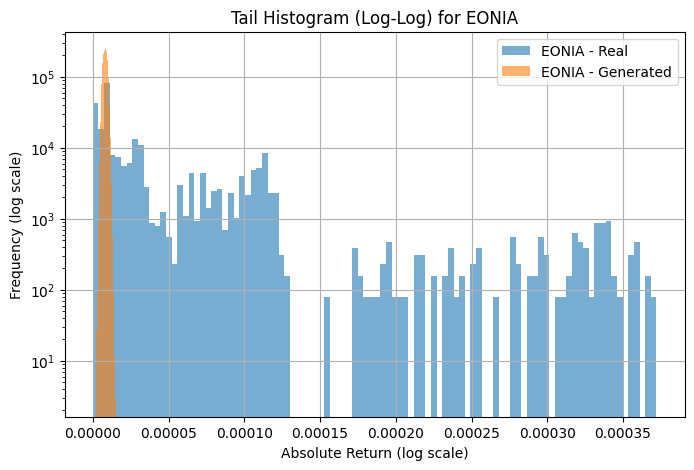

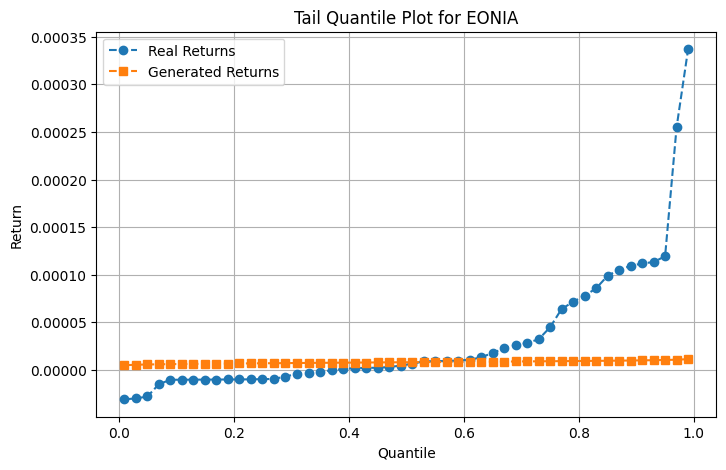

In [9]:
try:
    extreme_value_analysis(returns_df)
except:
    print("YOYOYOYO")

Generated Data (first 10 values): [6.7902010e-06 9.3107283e-06 5.8304304e-06 8.9273417e-06 1.0220165e-05
 7.5560542e-06 7.6813876e-06 6.6681478e-06 9.4745992e-06 1.0823697e-05]
Contains NaN: False
Contains only one unique value: [1.7749313e-06 2.3151445e-06 2.3592970e-06 ... 1.4305747e-05 1.4435638e-05
 1.4899717e-05]

Statistical Summary for EONIA - Real Data:
Mean: 0.000032
Std Dev: 0.000069
Skewness: 2.682698
Kurtosis: 8.158064
99.5% VaR: -0.000031

Statistical Summary for EONIA - Generated Data:
Mean: 0.000008
Std Dev: 0.000001
Skewness: 0.027410
Kurtosis: -0.439360
99.5% VaR: 0.000005


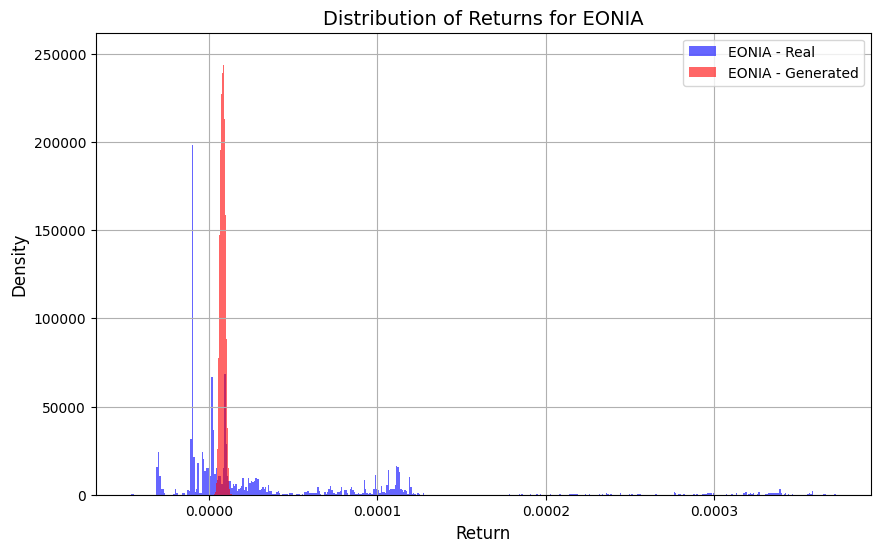

In [10]:
try:
    plot_histogram_distributions(returns_df)
except:
    print("YO")

Variance of Real Data: 0.000000
Variance of Generated Data: 0.000000
⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data


Mean Pairwise Distance (Real): 0.001171
Mean Pairwise Distance (Generated): 0.000019
⚠️ Warning: Potential Mode Collapse - Samples are too similar


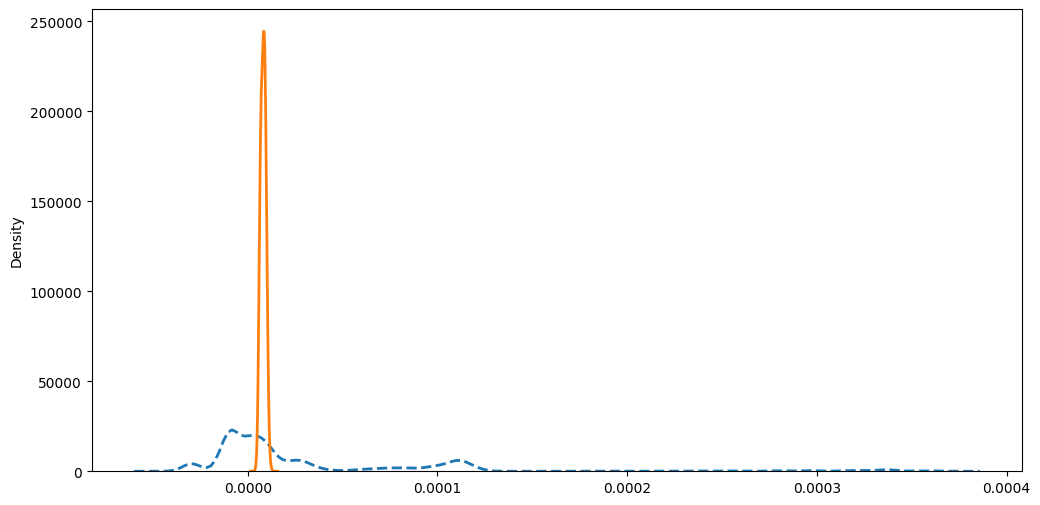

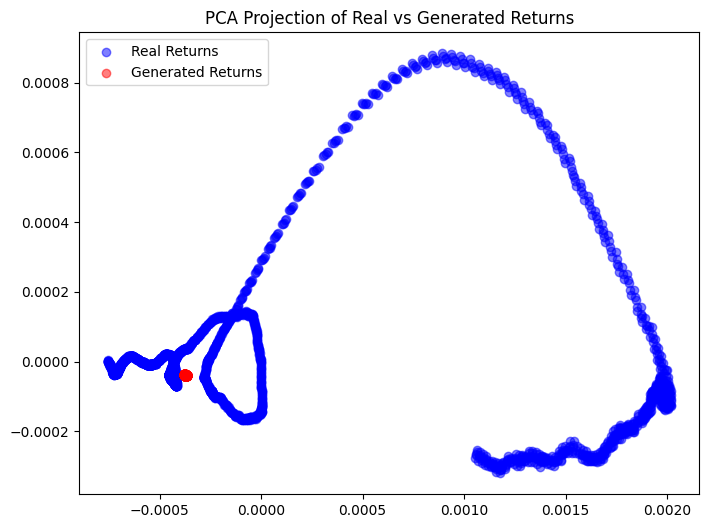

C:\Users\nicka\AppData\Local\Temp\ipykernel_2132\2645352524.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Assets', fontsize=12)


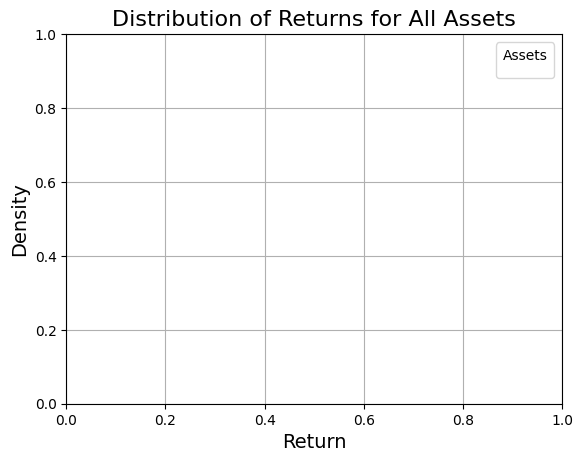

In [11]:
try:
    plot_distributions_with_mode_collapse_check(returns_df)
except:
    print("YO")